<a href="https://colab.research.google.com/github/farrelll227/Komputer_Grafis/blob/main/praktikum%203/Intersection_G211240017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Out-of-bounds Geometry Demo
Controls:
x, y, z: Rotate around specified axis
r: Reset to original position
q: Quit


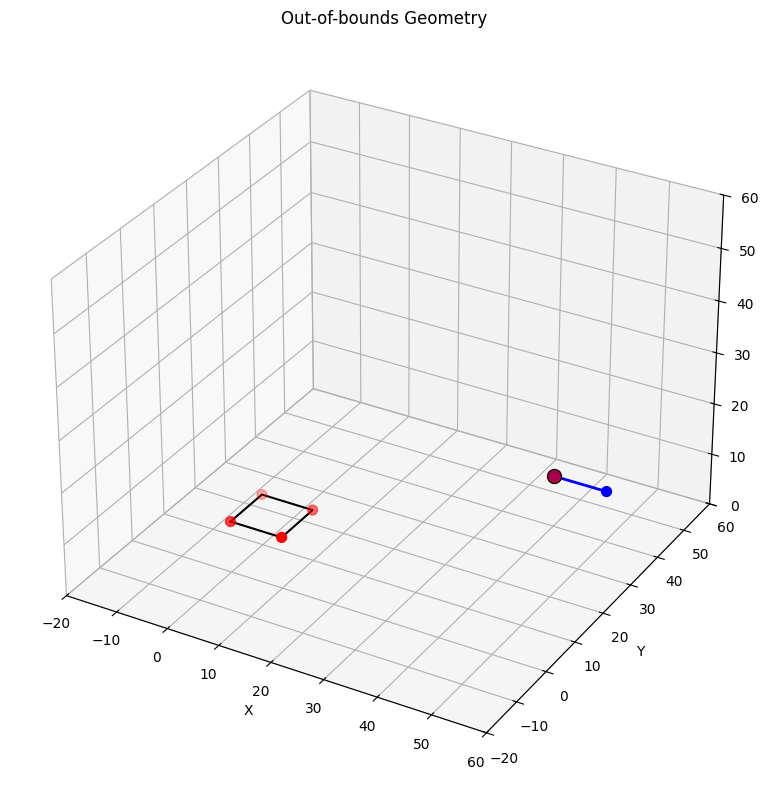

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, radians, sqrt

# Initialize original coordinates
x_original = [0, 10, 10, 0, 40, 50]  # Quad points + line points
y_original = [0, 0, 10, 10, 40, 40]  # Y-coordinates
z_original = [10, 10, 10, 10, 10, 10]  # All points at z=10 initially

# Working copies for transformations
x = x_original.copy()
y = y_original.copy()
z = z_original.copy()

# --- Center coordinates (rotation center)
xc, yc, zc = 0, 40, 0

# --- Define rotation functions
def rotx(xc, yc, zc, xp, yp, zp, Rx):
    yp -= yc
    zp -= zc
    yt = yp * cos(Rx) - zp * sin(Rx)
    zt = yp * sin(Rx) + zp * cos(Rx)
    return xp, yt + yc, zt + zc

def roty(xc, yc, zc, xp, yp, zp, Ry):
    xp -= xc
    zp -= zc
    xt = xp * cos(Ry) + zp * sin(Ry)
    zt = -xp * sin(Ry) + zp * cos(Ry)
    return xt + xc, yp, zt + zc

def rotz(xc, yc, zc, xp, yp, zp, Rz):
    xp -= xc
    yp -= yc
    xt = xp * cos(Rz) - yp * sin(Rz)
    yt = xp * sin(Rz) + yp * cos(Rz)
    return xt + xc, yt + yc, zp

# --- Plot system
def plotsystem(x, y, z, xh, yh, zh, hitcolor):
    plt.clf()
    ax = plt.axes(projection='3d')

    # Draw quad (plane)
    ax.plot([x[0], x[1], x[2], x[3], x[0]],
            [y[0], y[1], y[2], y[3], y[0]],
            [z[0], z[1], z[2], z[3], z[0]], 'k-')

    # Draw line segment
    ax.plot([x[4], x[5]], [y[4], y[5]], [z[4], z[5]], 'b-', linewidth=2)

    # Draw hit point
    ax.scatter(xh, yh, zh, c=hitcolor, s=100, marker='o', edgecolors='k')

    # Draw vertices
    ax.scatter(x[:4], y[:4], z[:4], c='r', s=50)  # Quad points in red
    ax.scatter([x[4], x[5]], [y[4], y[5]], [z[4], z[5]], c='b', s=50)  # Line points in blue

    # Set plot limits and labels
    ax.set_xlim([-20, 60])
    ax.set_ylim([-20, 60])
    ax.set_zlim([0, 60])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Out-of-bounds Geometry')
    ax.grid(True)
    plt.tight_layout()
    plt.pause(0.01)

# --- Compute hit point
def hitpoint(x, y, z):
    # Calculate line direction vector
    dx = x[5] - x[4]
    dy = y[5] - y[4]
    dz = z[5] - z[4]
    line_length = sqrt(dx*dx + dy*dy + dz*dz)

    # Handle degenerate cases
    if line_length < 1e-10:
        return x[4], y[4], z[4], 'r'  # Red: invalid line

    lx = dx / line_length
    ly = dy / line_length
    lz = dz / line_length

    # Calculate plane vectors
    ux = x[1] - x[0]
    uy = y[1] - y[0]
    uz = z[1] - z[0]

    vx = x[3] - x[0]
    vy = y[3] - y[0]
    vz = z[3] - z[0]

    # Calculate plane normal
    wx = uy*vz - uz*vy
    wy = uz*vx - ux*vz
    wz = ux*vy - uy*vx
    norm = sqrt(wx*wx + wy*wy + wz*wz)

    if norm < 1e-10:
        return x[4], y[4], z[4], 'r'  # Red: invalid plane

    wx /= norm
    wy /= norm
    wz /= norm

    # Plane equation
    d = -(wx*x[0] + wy*y[0] + wz*z[0])

    # Calculate distance from line start to plane
    dist = wx*x[4] + wy*y[4] + wz*z[4] + d

    # Calculate angle between line and plane normal
    cos_phi = wx*lx + wy*ly + wz*lz

    if abs(cos_phi) < 1e-10:
        return x[4], y[4], z[4], 'r'  # Red: parallel

    # Calculate hit distance
    Qh = -dist / cos_phi
    xh = x[4] + Qh * lx
    yh = y[4] + Qh * ly
    zh = z[4] + Qh * lz

    # Determine if hit is within segment
    if 0 <= Qh <= line_length:
        hitcolor = 'g'  # Green: valid hit
    else:
        hitcolor = 'b'  # Blue: out-of-bounds

    return xh, yh, zh, hitcolor

# --- Transform and plot
def transform_plot(rotation_func, angle):
    global x, y, z
    for i in range(len(x)):
        x[i], y[i], z[i] = rotation_func(xc, yc, zc, x[i], y[i], z[i], angle)
    xh, yh, zh, hitcolor = hitpoint(x, y, z)
    plotsystem(x, y, z, xh, yh, zh, hitcolor)

# --- Reset to original position
def reset_position():
    global x, y, z
    x = x_original.copy()
    y = y_original.copy()
    z = z_original.copy()
    xh, yh, zh, hitcolor = hitpoint(x, y, z)
    plotsystem(x, y, z, xh, yh, zh, hitcolor)

# --- Main interactive loop
plt.ion()
fig = plt.figure(figsize=(10, 8))
print("Out-of-bounds Geometry Demo")
print("Controls:")
print("x, y, z: Rotate around specified axis")
print("r: Reset to original position")
print("q: Quit")

reset_position()  # Initial plot

while True:
    cmd = input('\nCommand (x/y/z/r/q): ').lower()

    if cmd == 'x':
        try:
            angle = radians(float(input('Rx Degrees: ')))
            transform_plot(rotx, angle)
        except ValueError:
            print("Invalid input. Please enter a number.")

    elif cmd == 'y':
        try:
            angle = radians(float(input('Ry Degrees: ')))
            transform_plot(roty, angle)
        except ValueError:
            print("Invalid input. Please enter a number.")

    elif cmd == 'z':
        try:
            angle = radians(float(input('Rz Degrees: ')))
            transform_plot(rotz, angle)
        except ValueError:
            print("Invalid input. Please enter a number.")

    elif cmd == 'r':
        reset_position()
        print("Position reset")

    elif cmd == 'q':
        plt.close()
        break

    else:
        print("Invalid command. Please enter x, y, z, r, or q.")